# Проект 2. Разведывательный анализ данных

Описание и цели проекта отражены в отдельном фале README.

In [1]:
# Подгружаем необходимые библиотеки и сам датафрейм.
import pandas as pd
import numpy as np
from collections import Counter
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import PercentFormatter
%matplotlib inline
from scipy.stats import ttest_ind
import warnings; warnings.simplefilter('ignore')
import plotly
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
#import pylab
#from pprint import pprint

In [2]:
#  Для "красоты" меняем стиль графиков
mpl.style.use('Solarize_Light2')

# Читаем файл, смотрим что там есть
df = pd.read_csv('/Users/alexanderfilimonov/Личное/SkillFactory/Module_2_Рабочий/stud_math.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


В датафрейме содержится 30 столбцов - данные на 395 строк (студентов), 13 столбцов числовых и 17 номинативных.
Наименование столбцов вполне себе рабочее и переименовывать большого смысла нет.

In [3]:
pd.set_option('display.max_columns', 30)
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


В первых же 10 строчках датафрейма видно что есть значения NaN причем в нескольких как числовых так и номинативных столбцах. Надо с этим что-то делать!

## Далее построение анализа будет разбито на 2 части
### 1. Анализ Номинативных значений датафрейма
### 2. Анализ числовых значений датафрейма

Поскольку номинативные и числовые данные принципиально разные, то пришла идея написать функции, которые будут обрабатывать и оценивать каждый столбец выдавая график, статистику, наличие выбросов и т.д. и т.п.

#### Часть 1 - Анализ Номинативных значений датафрейма

In [4]:
# Определяеи функцию, которая будет заменять NaN и вместо них подставлять None 
# в столбцах c типом данных - Object
def replace_Nan_object(df, column_name):
    df[column_name] = df[column_name].astype(str).apply(
        lambda x: None if x.strip() == '' else x)

In [5]:
# Определяем функцию, которая производит анализ столбца object (номинативного)
# и передает в график количество пустых и не пустых значений в абсолютных и
# относительных цифрах. Также строится прогрессивный накопительный график
# который служит для удобства оценки значений покрывающих наибольший объем.

def analysis_object(df, column_name):
    
    print("Столбец - ", column_name)
    null_count = len(df[df[column_name].isnull()])
    total_count = len(df)

    NaN_count = len(df[column_name][df[column_name] == 'nan'])
    print("Количество пустых значений = {0} из {1} ({2:.2f}%)".format(
        null_count, total_count, null_count/total_count*100))
    print("Количество пустых значений (NaN) = {0} из {1} ({2:.2f}%)".format(
        NaN_count, total_count, NaN_count/total_count*100))
    print("Количество уникальных значений = ",
          df[column_name].nunique() - 1 if NaN_count > 0 else 0)
    print("Список значений = ",
          df[column_name].unique())
    data = df[column_name]

    fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    axes[0].set_title('\nРаспределение кол-ва значений\n столбца ' + column_name + "\n")
    axes[0].tick_params(labelrotation=45)
    hst = Counter(data)
    max_value = sum(hst.values())
    x = [tupl[0] for tupl in hst.most_common()]
    y = [tupl[1] for tupl in hst.most_common()]
    for i, y_i in enumerate(y):
        axes[0].text(i-0.3, 0.1*max(y), str(y_i)+' ≈ '+"{0:.0f}%".format(y_i/max_value*100), color='maroon',
                     fontweight='bold', fontsize=16, rotation=75)
    axes[0].bar(x, y)

    axes[1].set_title(
        "\nОтносительное значение \n столбца {} накопительной суммой\n".format(column_name))
    axes[1].tick_params(labelrotation=45)
    y = [tupl[1]/max_value for tupl in hst.most_common()]
    y_2 = [sum(y[:i+1]) for i in range(len(y))]
    axes[1].yaxis.set_major_formatter(PercentFormatter(1))
    axes[1].bar(x, y_2)
    for i, y_i in enumerate(y_2):
        axes[1].text(i-0.3, 0.3*max(y), "{0:.0f}%".format(y_i*100),
                     color='maroon', fontweight='bold', fontsize=16, rotation=75)

##### Анализируем столбец school
Используем аналитическую функцию

Столбец -  school
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 0 из 395 (0.00%)
Количество уникальных значений =  0
Список значений =  ['GP' 'MS']


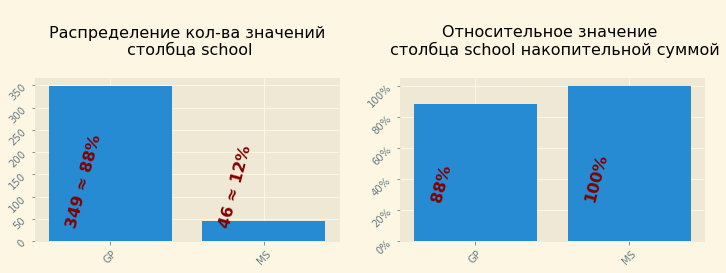

In [6]:
analysis_object(df, df.school.name)

 Выводы:
 * пропущенных значений типа NaN: НЕТ
 * уникальных значений: 2, покрывающих 100% данных
 * в данных очевидное преимущество одного признака над другим, но меньший признак более 10%, что может сиграть роль на последующем анализе данных.
 
##### Анализируем столбец sex
Используем аналитическую функцию

Столбец -  sex
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 0 из 395 (0.00%)
Количество уникальных значений =  0
Список значений =  ['F' 'M']


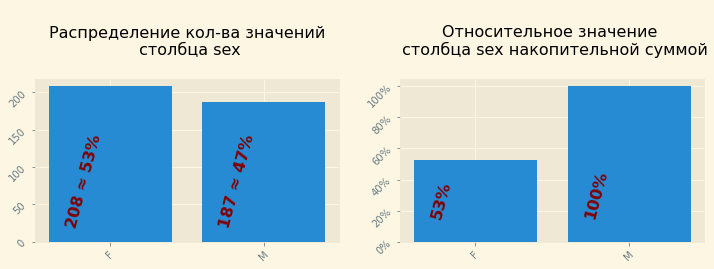

In [7]:
analysis_object(df, df.sex.name)

 Выводы:
 * пропущенных значений типа NaN: НЕТ
 * уникальных значений: 2, покрывающих 100% данных
 * данные распределены равномерно и годны для использования при последующем анализе данных.
 
##### Анализируем столбец address
Используем аналитическую функцию

<font color='blue'>Из-за присутствия пустых значений NaN, функция при первом запуске выдала ошибку при построении графика.
Для исправления ситуации сначала запускаем функцию replace_Nan_object и потом вновь фукцию аналитики.
Далее при таких ошибках поступаем точно также.</font>

Столбец -  address
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 17 из 395 (4.30%)
Количество уникальных значений =  2
Список значений =  ['U' 'nan' 'R']


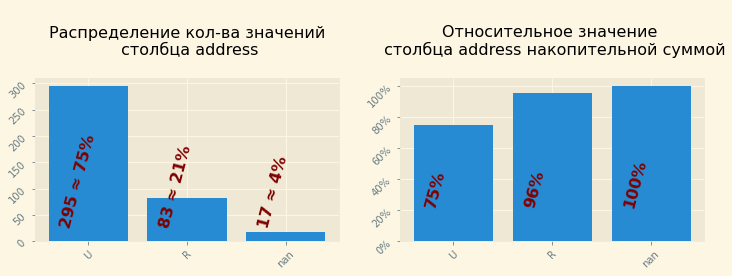

In [8]:
replace_Nan_object(df, df.address.name)
analysis_object(df, df.address.name)

 Выводы:
 * количество NaN значений: незначительное - менее 5%
 * уникальных значений: 2, покрывающих 96% данных столбца
 * в данных очевидное преимущество одного признака над другим, но меньший признак более 20%, что может сиграть роль на последующем анализе данных.

##### Анализируем столбец famsize
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  famsize
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 27 из 395 (6.84%)
Количество уникальных значений =  2
Список значений =  ['nan' 'GT3' 'LE3']


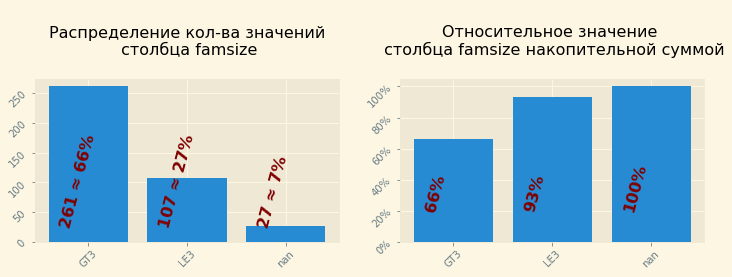

In [9]:
replace_Nan_object(df, df.famsize.name)
analysis_object(df, df.famsize.name)

 Выводы:
 * количество NaN значений: незначительное - менее 7%
 * уникальных значений: 2, покрывающих 93% данных столбца
 * в данных есть смещение в сторону одного из значений. Размер выборки достаточен для проведения анализа данных.
 
##### Анализируем столбец Pstatus
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  Pstatus
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 45 из 395 (11.39%)
Количество уникальных значений =  2
Список значений =  ['A' 'nan' 'T']


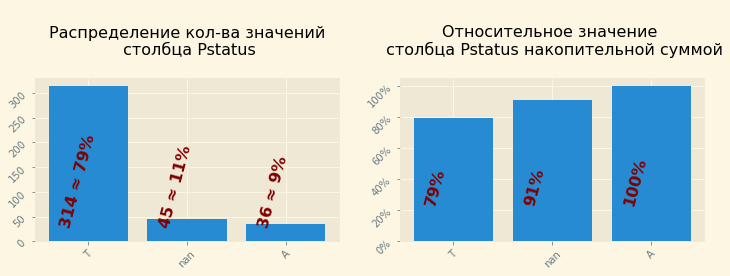

In [10]:
replace_Nan_object(df, df.Pstatus.name)
analysis_object(df, df.Pstatus.name)

 Выводы:
 * количество NaN значений: существенное - 11%
 * уникальных значений: 2, покрывающих 89% данных столбца
 * в данных есть существенное смещение в сторону одного из значений. Возможность использования столбца в дальнейшем анализе не высокая. Рассмотреть исключение столбеца из последующего анализа
 
##### Анализируем столбец Mjob
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  Mjob
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 19 из 395 (4.81%)
Количество уникальных значений =  5
Список значений =  ['at_home' 'health' 'other' 'services' 'teacher' 'nan']


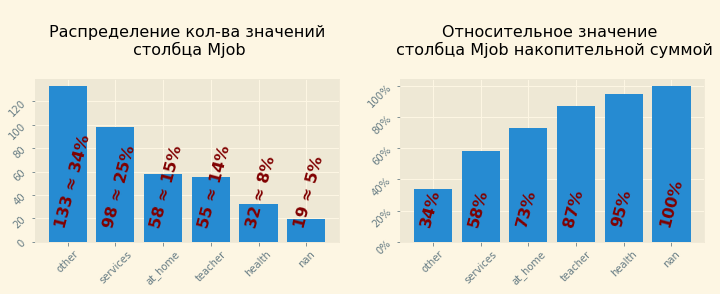

In [11]:
replace_Nan_object(df, df.Mjob.name)
analysis_object(df, df.Mjob.name)

Выводы:
 * количество NaN значений: незначительное - 5%
 * уникальных значений: 4, покрывающих 62% данных столбца
 * данные распределены равномерно и могут быть использованы для последующего анализа
 
##### Анализируем столбец Fjob
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  Fjob
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 36 из 395 (9.11%)
Количество уникальных значений =  5
Список значений =  ['teacher' 'other' 'nan' 'health' 'services' 'at_home']


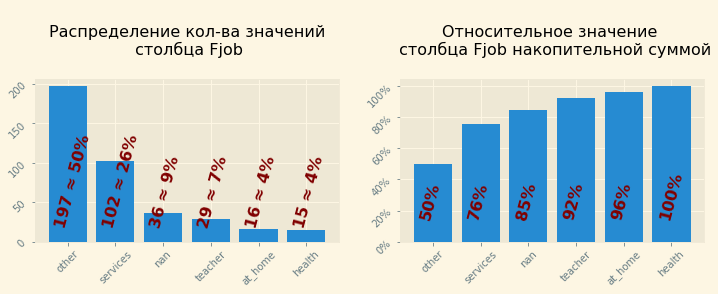

In [12]:
replace_Nan_object(df, df.Fjob.name)
analysis_object(df, df.Fjob.name)

Выводы:
 * количество NaN значений: умеренное - 9%
 * уникальных значений: 4, покрывающих всего лишь 41% данных столбца
 * данные распределены не равномерно и существенное смещение идет в сторону значения "other", которое не несет достаточной информации для анализа. Возможность использования столбца в дальнейшем анализе не высокая. Рассмотреть исключение столбеца из последующего анализа.
 
##### Анализируем столбец reason
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  reason
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 17 из 395 (4.30%)
Количество уникальных значений =  4
Список значений =  ['course' 'other' 'home' 'reputation' 'nan']


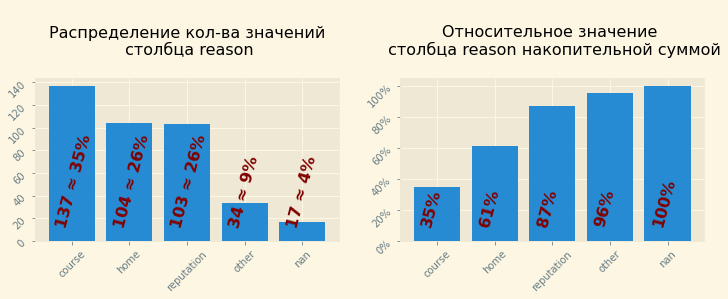

In [13]:
replace_Nan_object(df, df.reason.name)
analysis_object(df, df.reason.name)

Выводы:
 * количество NaN значений: незначительное - 4%
 * уникальных значений: 3, покрывающих 87% данных столбца
 * данные распределены равномерно и могут быть использованы для последующего анализа
 
##### Анализируем столбец guardian
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  guardian
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 31 из 395 (7.85%)
Количество уникальных значений =  3
Список значений =  ['mother' 'father' 'other' 'nan']


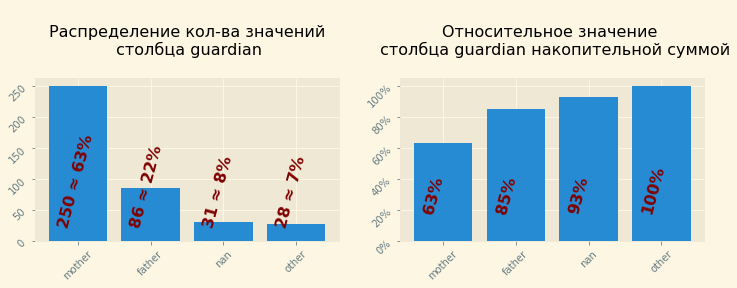

In [14]:
replace_Nan_object(df, df.guardian.name)
analysis_object(df, df.guardian.name)

 Выводы:
 * количество NaN значений: незначительное - 7%
 * уникальных значений: 2, покрывающих 85% данных столбца
 * в данных есть смещение в сторону одного из значений. Размер выборки достаточен для проведения анализа данных.
 
##### Анализируем столбец schoolsup
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  schoolsup
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 9 из 395 (2.28%)
Количество уникальных значений =  2
Список значений =  ['yes' 'no' 'nan']


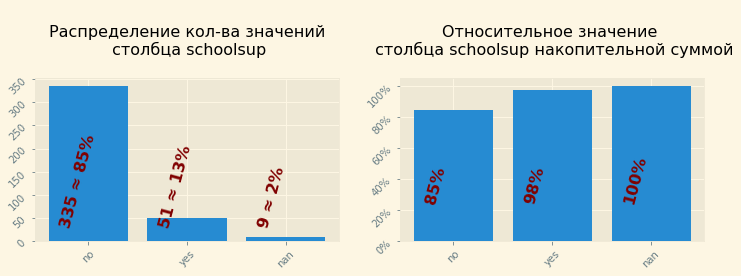

In [15]:
replace_Nan_object(df, df.schoolsup.name)
analysis_object(df, df.schoolsup.name)

Выводы:
 * количество NaN значений: незначительное - 2%
 * уникальных значений: 2, покрывающих 98% данных столбца
 * в данных есть существенное смещение в сторону одного из значений. Размер выборки достаточен для проведения анализа данных. Возможность использования столбца в дальнейшем анализе не высокая. Рассмотреть исключение столбеца из последующего анализа.
 
##### Анализируем столбец famsup
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  famsup
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 39 из 395 (9.87%)
Количество уникальных значений =  2
Список значений =  ['no' 'yes' 'nan']


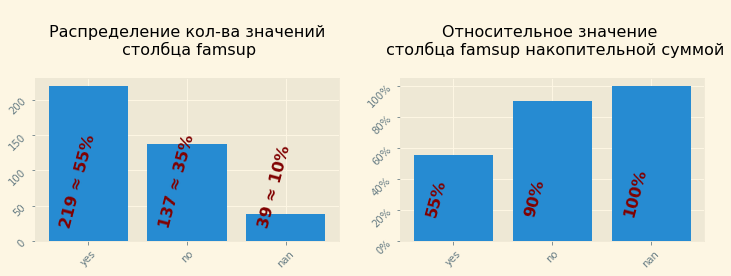

In [16]:
replace_Nan_object(df, df.famsup.name)
analysis_object(df, df.famsup.name)

Выводы:
 * количество NaN значений: умеренное - 10%
 * уникальных значений: 2, покрывающее 90% данных столбца
 * данные распределены равномерно и могут быть использованы для последующего анализа
 
##### Анализируем столбец paid
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  paid
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 40 из 395 (10.13%)
Количество уникальных значений =  2
Список значений =  ['no' 'nan' 'yes']


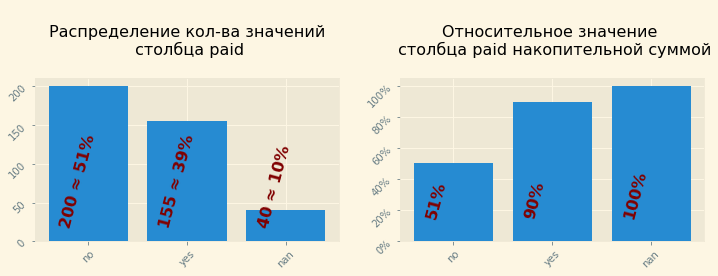

In [17]:
replace_Nan_object(df, df.paid.name)
analysis_object(df, df.paid.name)

Выводы:
 * количество NaN значений: умеренное - 10%
 * уникальных значений: 2, покрывающее 90% данных столбца
 * данные распределены равномерно и могут быть использованы для последующего анализа
 
##### Анализируем столбец activities
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  activities
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 14 из 395 (3.54%)
Количество уникальных значений =  2
Список значений =  ['no' 'yes' 'nan']


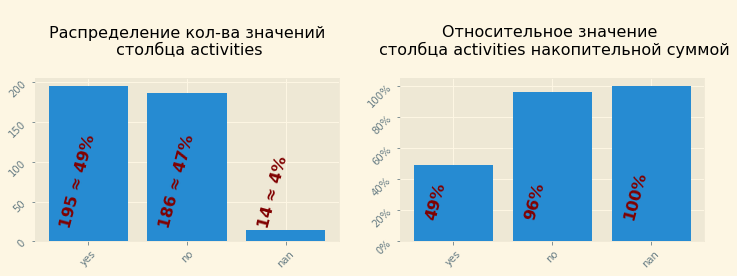

In [18]:
replace_Nan_object(df, df.activities.name)
analysis_object(df, df.activities.name)

Выводы:
 * количество NaN значений: незначительное - 4%
 * уникальных значений: 2, покрывающее 96% данных столбца
 * данные распределены равномерно и могут быть использованы для последующего анализа
 
##### Анализируем столбец nursery
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  nursery
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 16 из 395 (4.05%)
Количество уникальных значений =  2
Список значений =  ['yes' 'no' 'nan']


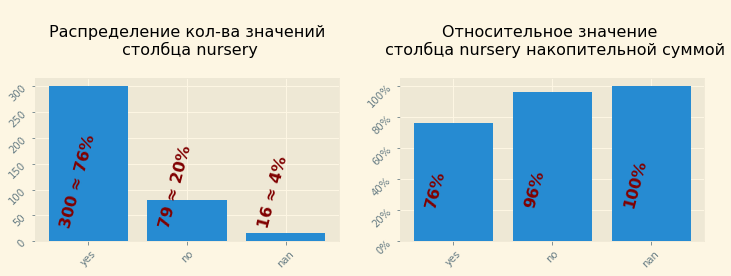

In [19]:
replace_Nan_object(df, df.nursery.name)
analysis_object(df, df.nursery.name)

Выводы:
 * количество NaN значений: незначительное - 4%
 * уникальных значений: 2, покрывающее 96% данных столбца
 * в данных есть существенное смещение в сторону одного из значений. Размер выборки достаточен для проведения анализа данных.
 
##### Анализируем столбец higher
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  higher
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 20 из 395 (5.06%)
Количество уникальных значений =  2
Список значений =  ['yes' 'nan' 'no']


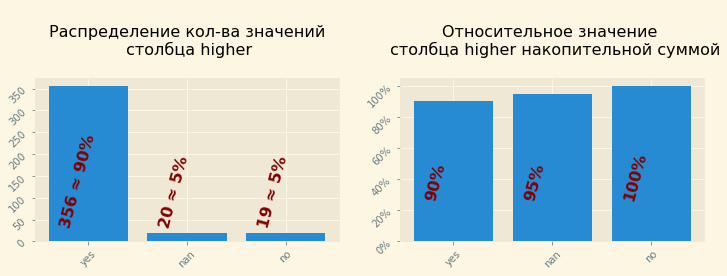

In [20]:
replace_Nan_object(df, df.higher.name)
analysis_object(df, df.higher.name)

Выводы:
 * количество NaN значений: незначительное - 5%
 * уникальных значений: 2, покрывающее 95% данных столбца
 * в данных есть очень существенное смещение в сторону одного из значений. Размер выборки достаточен для проведения анализа данных. Возможность использования столбца в дальнейшем анализе не высокая. Рассмотреть исключение столбеца из последующего анализа.
 
##### Анализируем столбец internet
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  internet
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 34 из 395 (8.61%)
Количество уникальных значений =  2
Список значений =  ['nan' 'yes' 'no']


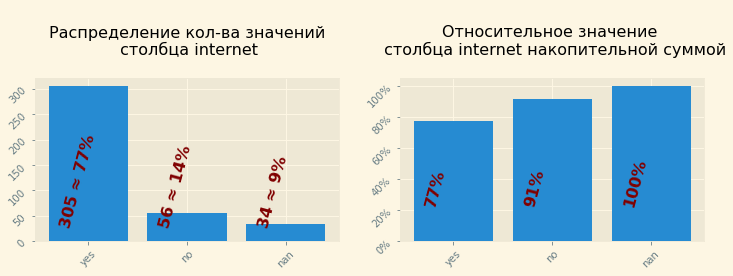

In [21]:
replace_Nan_object(df, df.internet.name)
analysis_object(df, df.internet.name)

Выводы:
 * количество NaN значений: умеренное - 9%
 * уникальных значений: 2, покрывающее 91% данных столбца
 * в данных есть очень существенное смещение в сторону одного из значений. Размер выборки достаточен для проведения анализа данных. Возможность использования столбца в дальнейшем анализе не высокая. Рассмотреть исключение столбеца из последующего анализа.
 
##### Анализируем столбец romantic
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  romantic
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 31 из 395 (7.85%)
Количество уникальных значений =  2
Список значений =  ['no' 'nan' 'yes']


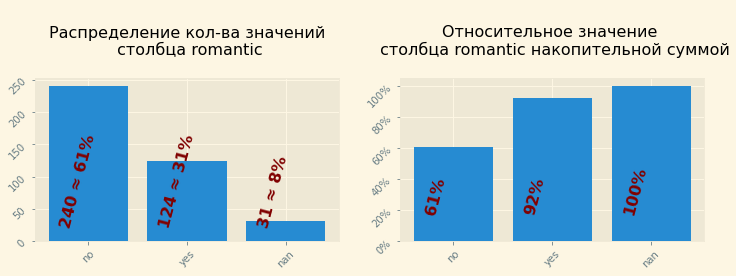

In [22]:
replace_Nan_object(df, df.romantic.name)
analysis_object(df, df.romantic.name)

Выводы:
 * количество NaN значений: умеренное - 8%
 * уникальных значений: 2, покрывающее 92% данных столбца
 * в данных есть небольшое смещение в сторону одного из значений. Размер выборки достаточен для проведения анализа данных.


#### Часть 2 - Анализ числовых значений датафрейма

In [23]:
# Определяем функцию, которая производит анализ столбцов int64 и float64 (числовых)
# и передает аналитику в график. 

def analysis_num_values(df, column_name):
    
    print("Столбец - ", column_name)
    null_count = len(df[df[column_name].isnull()])
    total_count = len(df)

    #    NaN_count = len(df[column_name][df[column_name] == 'nan'])
    print("Количество пустых значений = {0} из {1} ({2:.2f}%)".format(
        null_count, total_count, null_count/total_count*100))
    print("Количество уникальных значений = ", df[column_name].nunique())
    print("Список значений = ", df[column_name].unique())
    IQR_1st = df[column_name].quantile(0.25)
    IQR_3rd = df[column_name].quantile(0.75)
    IQR = IQR_3rd - IQR_1st
    lower_outlier = IQR_1st - 1.5*IQR
    higher_outlier = IQR_3rd + 1.5*IQR
    
    print("Границы выбросов: Нижняя - {Low}, Верхняя - {High}".format(Low=lower_outlier, High=higher_outlier))
    outlier_count = len(df[df[column_name] < lower_outlier]) + \
        len(df[df[column_name] > higher_outlier])
    print("Найдено выбросов: {0} ≈ {1:.2f}%".format(
        outlier_count, outlier_count/total_count*100)) 
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    # Строим Boxplot для столбца
    sns.boxplot(x=column_name, data=df, ax=axes[0], color='green').set_title(
        "\nДиаграмма\n размаха " + column_name + "\n")
    # Строим гистограмму распределения
#    sns.distplot(df[column_name], ax=axes[1]).set_title(
#        'Распределение значений столбца '+column_name)
#    sns.jointplot(x=column_name,y=column_name, data=df, kind='reg', ax=axes[1])
    sns.distplot(df[column_name], ax=axes[1], color='black').set_title(
            "\nРаспределение\n значений столбца " + column_name + "\n")

In [24]:
def replace_Nan_mode(df, column_name):
    df[column_name] = pd.Series(
        np.array([df[column_name].mode().sum() if np.isnan(x) else x for x in df[column_name]]))

##### Анализируем столбец age
Используем аналитическую функцию analysis_num_values

Столбец -  age
Количество пустых значений = 0 из 395 (0.00%)
Количество уникальных значений =  8
Список значений =  [18 17 15 16 19 22 20 21]
Границы выбросов: Нижняя - 13.0, Верхняя - 21.0
Найдено выбросов: 1 ≈ 0.25%


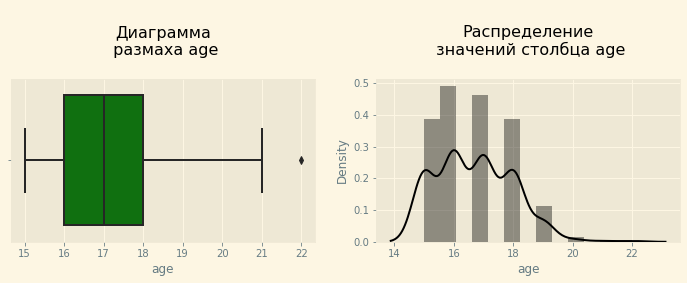

In [25]:
analysis_num_values(df, df.age.name)

Выводы:
 * количество NaN значений: отличное - 0
 * уникальных значений: 8, удовлетворительное значение
 * в данных есть смещение, но данные выглядят правдоподобно. Обнаруженный выброс несмотря на правило определения выбросов не выглядит как ошибка. Скорее всего значения верные и могут использоваться для последующего анализа.
 
##### Анализируем столбец Medu
Используем аналитическую функцию analysis_num_values

Столбец -  Medu
Количество пустых значений = 3 из 395 (0.76%)
Количество уникальных значений =  5
Список значений =  [ 4.  1.  3.  2. nan  0.]
Границы выбросов: Нижняя - -1.0, Верхняя - 7.0
Найдено выбросов: 0 ≈ 0.00%


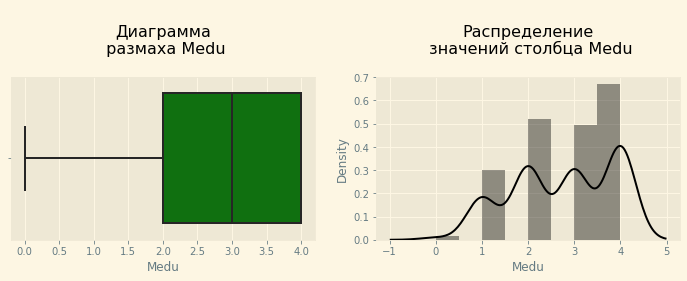

In [26]:
analysis_num_values(df, df.Medu.name)

Выводы:
 * количество NaN значений: хоршее - 1%
 * уникальных значений: 5, удовлетворительное значение
 * выбросов нет
 * для оптимизации столбца производи расчет "моды" и заполняем этим значением пустые значения
 
 Будем использовать функцию replace_Nan_mode, для этого определим функцию в начале этого аналитического раздела.

In [27]:
replace_Nan_mode(df, df.Medu.name)

Проверим что получилось еще раз запустив аналитическую функцию:

Столбец -  Medu
Количество пустых значений = 0 из 395 (0.00%)
Количество уникальных значений =  5
Список значений =  [4. 1. 3. 2. 0.]
Границы выбросов: Нижняя - -1.0, Верхняя - 7.0
Найдено выбросов: 0 ≈ 0.00%


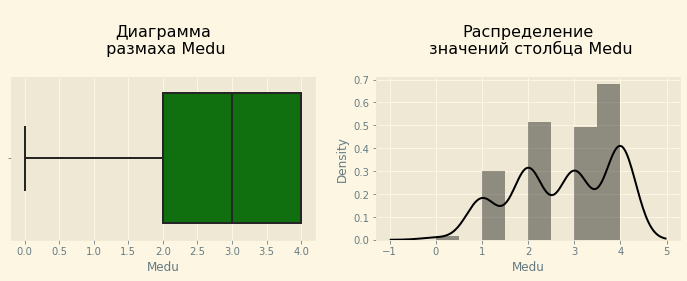

In [28]:
analysis_num_values(df, df.Medu.name)

##### Анализируем столбец Fedu
Используем аналитическую функцию analysis_num_values

Столбец -  Fedu
Количество пустых значений = 24 из 395 (6.08%)
Количество уникальных значений =  6
Список значений =  [ 4.  1.  2.  3. 40. nan  0.]
Границы выбросов: Нижняя - 0.5, Верхняя - 4.5
Найдено выбросов: 3 ≈ 0.76%


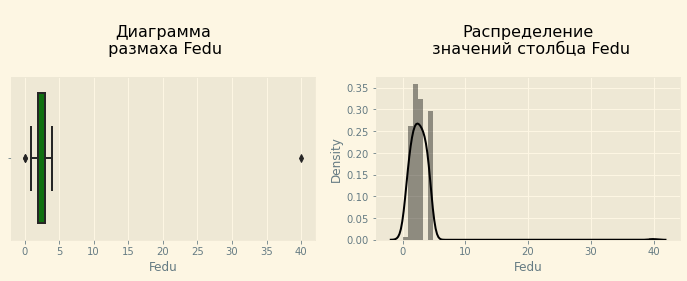

In [29]:
analysis_num_values(df, df.Fedu.name)

Выводы:
 * количество NaN значений: удовлетворительное - 6%
 * уникальных значений: 6, удовлетворительное значение
 * выбросов 3 - заменим эти значения медианой
 * для оптимизации столбца производим расчет "моды" и заполняем этим значением пустые значения
 
 Будем использовать функцию replace_Nan_mode.

In [30]:
replace_Nan_mode(df, df.Fedu.name)

Проверим что получилось еще раз запустив аналитическую функцию:

Столбец -  Fedu
Количество пустых значений = 0 из 395 (0.00%)
Количество уникальных значений =  6
Список значений =  [ 4.  1.  2.  3. 40.  0.]
Границы выбросов: Нижняя - 0.5, Верхняя - 4.5
Найдено выбросов: 3 ≈ 0.76%


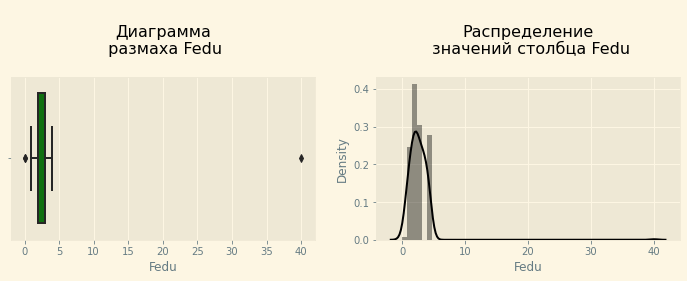

In [31]:
analysis_num_values(df, df.Fedu.name)

##### Анализируем столбец traveltime
Используем аналитическую функцию analysis_num_values

Столбец -  traveltime
Количество пустых значений = 28 из 395 (7.09%)
Количество уникальных значений =  4
Список значений =  [ 2.  1.  3. nan  4.]
Границы выбросов: Нижняя - -0.5, Верхняя - 3.5
Найдено выбросов: 7 ≈ 1.77%


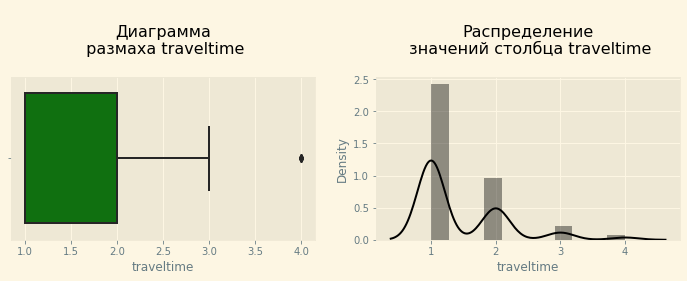

In [32]:
analysis_num_values(df, df.traveltime.name)

Выводы:
 * количество NaN значений: удовлетворительное - 7%
 * уникальных значений: 4, удовлетворительное значение
 * выбросов 7
 * для оптимизации столбца производим расчет "моды" и заполняем этим значением пустые значения
 
 Будем использовать функцию replace_Nan_mode. Выбросы пока не трогаем, они выглядят правдоподобно не смотря на то, что они определяются как выбросы по формуле.

In [33]:
replace_Nan_mode(df, df.traveltime.name)

Проверим что получилось еще раз запустив аналитическую функцию:

Столбец -  traveltime
Количество пустых значений = 0 из 395 (0.00%)
Количество уникальных значений =  4
Список значений =  [2. 1. 3. 4.]
Границы выбросов: Нижняя - -0.5, Верхняя - 3.5
Найдено выбросов: 7 ≈ 1.77%


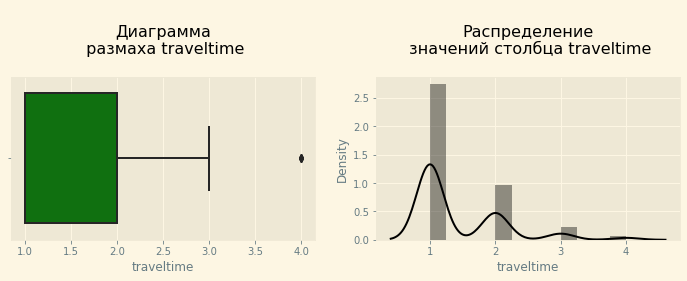

In [34]:
analysis_num_values(df, df.traveltime.name)

##### Анализируем столбец studytime
Используем аналитическую функцию analysis_num_values

Столбец -  studytime
Количество пустых значений = 7 из 395 (1.77%)
Количество уникальных значений =  4
Список значений =  [ 2.  3.  1. nan  4.]
Границы выбросов: Нижняя - -0.5, Верхняя - 3.5
Найдено выбросов: 27 ≈ 6.84%


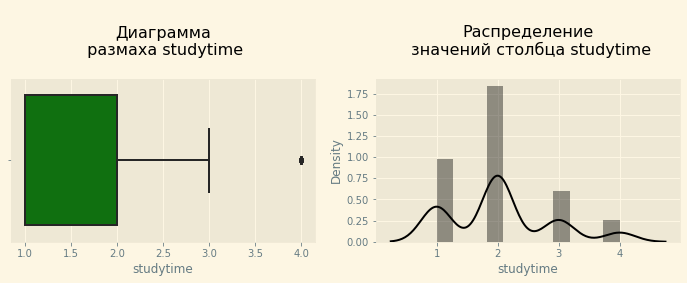

In [35]:
analysis_num_values(df, df.studytime.name)

Выводы:
 * количество NaN значений: хорошее - 2%
 * уникальных значений: 4, удовлетворительное значение
 * выбросов 26
 * для оптимизации столбца производим расчет "моды" и заполняем этим значением пустые значения
 
 Будем использовать функцию replace_Nan_mode. Выбросы пока не трогаем, они выглядят правдоподобно не смотря на то, что они определяются как выбросы по формуле.

In [36]:
replace_Nan_mode(df, df.studytime.name)

Проверим что получилось еще раз запустив аналитическую функцию:

Столбец -  studytime
Количество пустых значений = 0 из 395 (0.00%)
Количество уникальных значений =  4
Список значений =  [2. 3. 1. 4.]
Границы выбросов: Нижняя - -0.5, Верхняя - 3.5
Найдено выбросов: 27 ≈ 6.84%


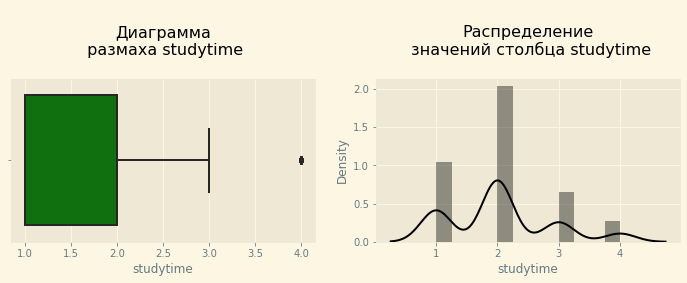

In [37]:
analysis_num_values(df, df.studytime.name)

##### Анализируем столбец failures
Используем аналитическую функцию analysis_num_values

Столбец -  failures
Количество пустых значений = 22 из 395 (5.57%)
Количество уникальных значений =  4
Список значений =  [ 0.  3. nan  2.  1.]
Границы выбросов: Нижняя - 0.0, Верхняя - 0.0
Найдено выбросов: 80 ≈ 20.25%


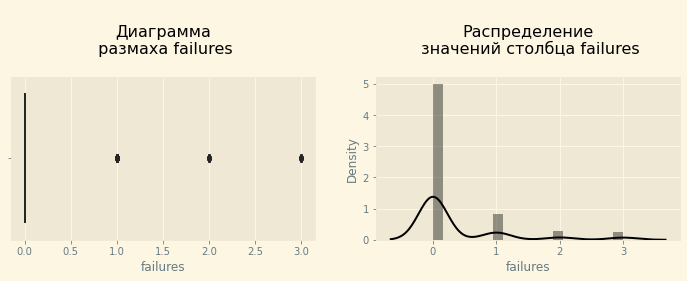

In [38]:
analysis_num_values(df, df.failures.name)

Выводы:
 * количество NaN значений: удовлетворительное - 5%
 * уникальных значений: 4, удовлетворительное значение
 * выбросов 83 - многовато - более 20%, но учитывая, что по условию задания количество внеучебных неудач (n, если 1<=n<=3, иначе 0), то выбросов нет. Ничего с этим не делаем.
 * для оптимизации столбца производим расчет "моды" и заполняем этим значением пустые значения
 
 Будем использовать функцию replace_Nan_mode.

In [39]:
replace_Nan_mode(df, df.failures.name)

Проверим что получилось еще раз запустив аналитическую функцию:

Столбец -  failures
Количество пустых значений = 0 из 395 (0.00%)
Количество уникальных значений =  4
Список значений =  [0. 3. 2. 1.]
Границы выбросов: Нижняя - 0.0, Верхняя - 0.0
Найдено выбросов: 80 ≈ 20.25%


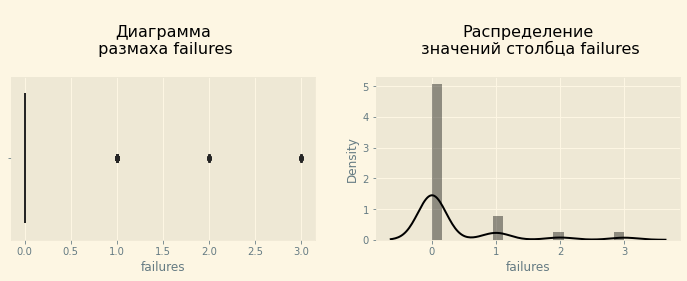

In [40]:
analysis_num_values(df, df.failures.name)

##### Анализируем столбец studytime, granular
Используем аналитическую функцию analysis_num_values

Столбец -  studytime, granular
Количество пустых значений = 7 из 395 (1.77%)
Количество уникальных значений =  4
Список значений =  [ -6.  -9.  -3.  nan -12.]
Границы выбросов: Нижняя - -10.5, Верхняя - 1.5
Найдено выбросов: 27 ≈ 6.84%


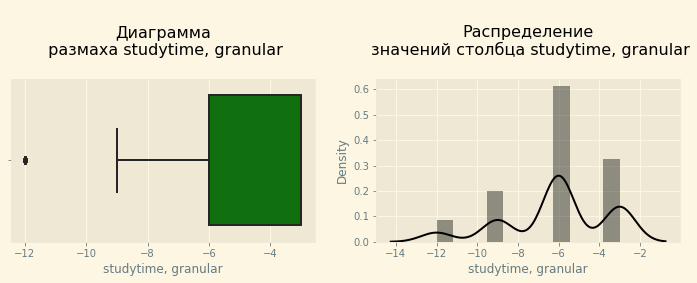

In [41]:
analysis_num_values(df, df['studytime, granular'].name)

Выводы:

Как следует из задания к проекту - studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов). Столбца studytime, granular в описании нет.

По факту значения в столбце преимущественно отрицательные и не попадают под описание в любом случае.
Делаю вывод, что это столбец с ошибками, поправить одназначно правильным способом нет возможности.
К дальнейшему анализу не годится.



##### Анализируем столбец famrel
Используем аналитическую функцию analysis_num_values

Столбец -  famrel
Количество пустых значений = 27 из 395 (6.84%)
Количество уникальных значений =  6
Список значений =  [ 4.  5.  3. nan -1.  2.  1.]
Границы выбросов: Нижняя - 2.5, Верхняя - 6.5
Найдено выбросов: 25 ≈ 6.33%


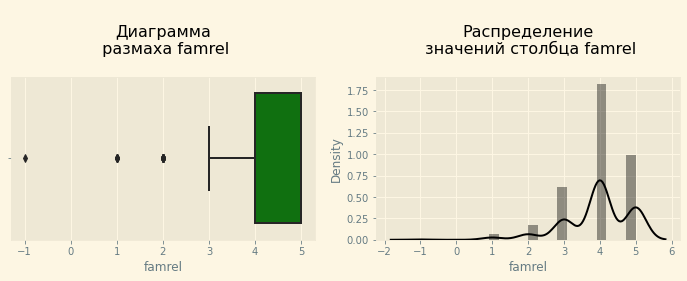

In [42]:
analysis_num_values(df, df.famrel.name)

Выводы:
 * количество NaN значений: удовлетворительное - 7%
 * уникальных значений: 6, удовлетворительное значение
 * выбросов 28
 * для оптимизации столбца производим расчет "моды" и заполняем этим значением пустые значения, а также производим расчет "медианы" и заполняем им выбросы.
 
 Будем использовать функцию replace_Nan_mode.

In [43]:
replace_Nan_mode(df, df.famrel.name)

Проверим что получилось еще раз запустив аналитическую функцию:

Столбец -  famrel
Количество пустых значений = 0 из 395 (0.00%)
Количество уникальных значений =  6
Список значений =  [ 4.  5.  3. -1.  2.  1.]
Границы выбросов: Нижняя - 3.25, Верхняя - 5.25
Найдено выбросов: 87 ≈ 22.03%


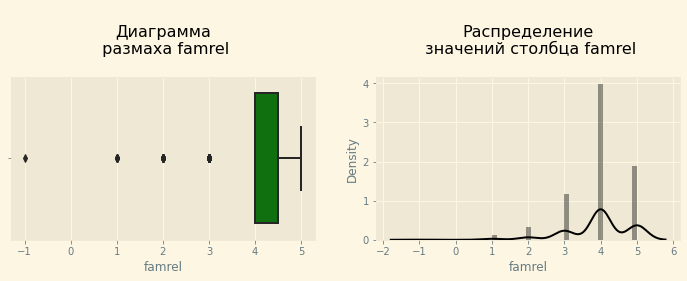

In [44]:
analysis_num_values(df, df.famrel.name)

##### Анализируем столбец freetime
Используем аналитическую функцию analysis_num_values

Столбец -  freetime
Количество пустых значений = 11 из 395 (2.78%)
Количество уникальных значений =  5
Список значений =  [ 3.  2.  4.  1.  5. nan]
Границы выбросов: Нижняя - 1.5, Верхняя - 5.5
Найдено выбросов: 18 ≈ 4.56%


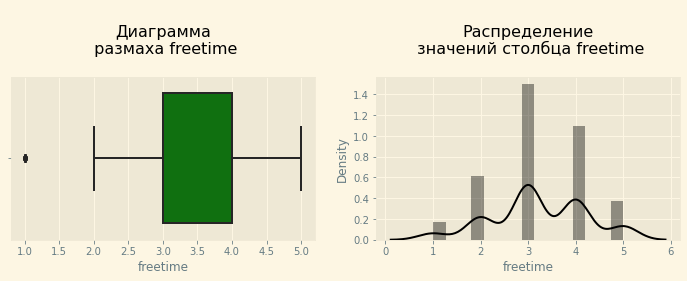

In [45]:
analysis_num_values(df, df.freetime.name)

Выводы:
 * количество NaN значений: хорошее - 2%
 * уникальных значений: 5, удовлетворительное значение
 * выбросов 22 - но по описанию столбца следует, что выбросов нет.
 * для оптимизации столбца производим расчет "моды" и заполняем этим значением пустые значения.
 
 Будем использовать функцию replace_Nan_mode.

In [46]:
replace_Nan_mode(df, df.freetime.name)

Проверим что получилось еще раз запустив аналитическую функцию:

Столбец -  freetime
Количество пустых значений = 0 из 395 (0.00%)
Количество уникальных значений =  5
Список значений =  [3. 2. 4. 1. 5.]
Границы выбросов: Нижняя - 1.5, Верхняя - 5.5
Найдено выбросов: 18 ≈ 4.56%


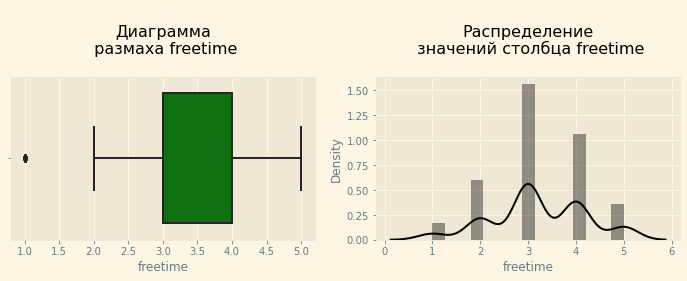

In [47]:
analysis_num_values(df, df.freetime.name)

##### Анализируем столбец goout
Используем аналитическую функцию analysis_num_values

Столбец -  goout
Количество пустых значений = 8 из 395 (2.03%)
Количество уникальных значений =  5
Список значений =  [ 4.  3.  2.  1.  5. nan]
Границы выбросов: Нижняя - -1.0, Верхняя - 7.0
Найдено выбросов: 0 ≈ 0.00%


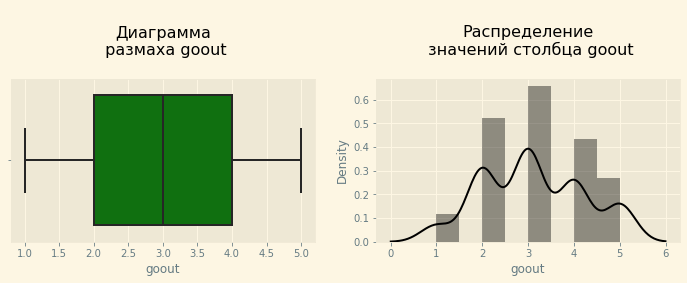

In [48]:
analysis_num_values(df, df.goout.name)

Выводы:
 * количество NaN значений: хорошее - 1%
 * уникальных значений: 5, удовлетворительное значение
 * выбросов 27 - но по описанию столбца следует, что выбросов нет.
 * для оптимизации столбца производим расчет "моды" и заполняем этим значением пустые значения.
 
 Будем использовать функцию replace_Nan_mode.

In [49]:
replace_Nan_mode(df, df.goout.name)

Проверим что получилось еще раз запустив аналитическую функцию:

Столбец -  goout
Количество пустых значений = 0 из 395 (0.00%)
Количество уникальных значений =  5
Список значений =  [4. 3. 2. 1. 5.]
Границы выбросов: Нижняя - -1.0, Верхняя - 7.0
Найдено выбросов: 0 ≈ 0.00%


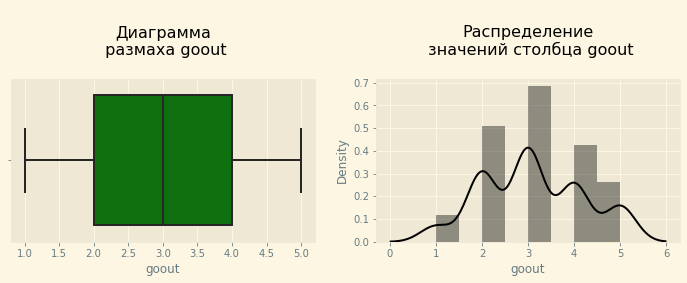

In [50]:
analysis_num_values(df, df.goout.name)

##### Анализируем столбец health
Используем аналитическую функцию analysis_num_values

Столбец -  health
Количество пустых значений = 15 из 395 (3.80%)
Количество уникальных значений =  5
Список значений =  [ 3.  5.  1.  2.  4. nan]
Границы выбросов: Нижняя - 0.0, Верхняя - 8.0
Найдено выбросов: 0 ≈ 0.00%


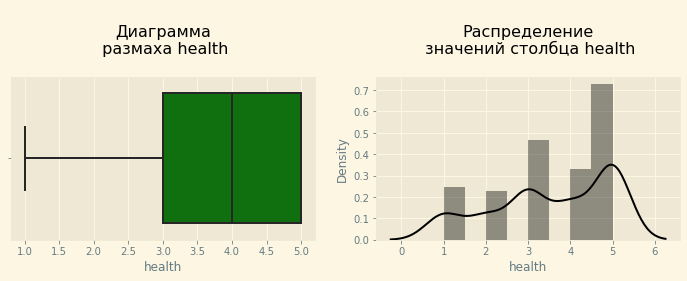

In [51]:
analysis_num_values(df, df.health.name)

Выводы:
 * количество NaN значений: хорошее - 2%
 * уникальных значений: 5, удовлетворительное значение
 * выбросов 0
 * для оптимизации столбца производим расчет "моды" и заполняем этим значением пустые значения.
 
 Будем использовать функцию replace_Nan_mode.

In [52]:
replace_Nan_mode(df, df.health.name)

Проверим что получилось еще раз запустив аналитическую функцию:

Столбец -  health
Количество пустых значений = 0 из 395 (0.00%)
Количество уникальных значений =  5
Список значений =  [3. 5. 1. 2. 4.]
Границы выбросов: Нижняя - 0.0, Верхняя - 8.0
Найдено выбросов: 0 ≈ 0.00%


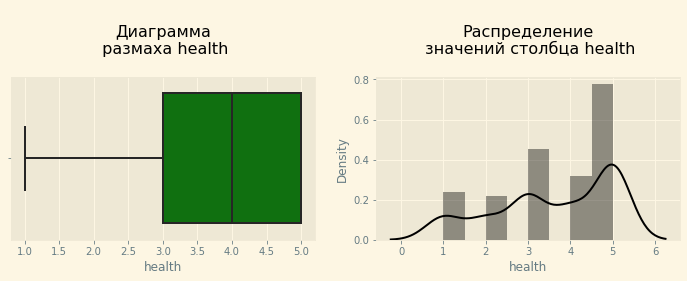

In [53]:
analysis_num_values(df, df.health.name)

##### Анализируем столбец absences
Используем аналитическую функцию analysis_num_values

Столбец -  absences
Количество пустых значений = 12 из 395 (3.04%)
Количество уникальных значений =  36
Список значений =  [  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.]
Границы выбросов: Нижняя - -12.0, Верхняя - 20.0
Найдено выбросов: 17 ≈ 4.30%


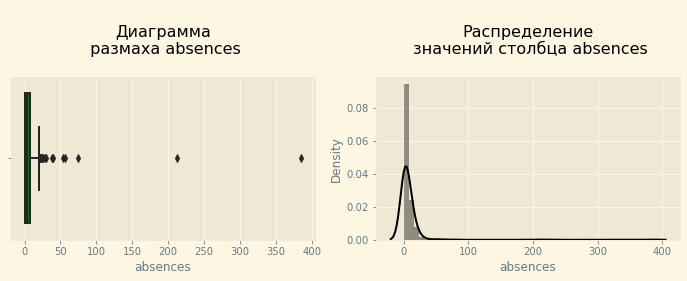

In [54]:
analysis_num_values(df, df.absences.name)

### Выводы:
 * количество NaN значений: хорошее - 2%
 * уникальных значений: 30, удовлетворительное значение
 * выбросов 54 - их много и они идут в широком диапозоне. Скорее всего это не ошибка, а норма.
 * для оптимизации столбца производим расчет "моды" и заполняем этим значением пустые значения.
 
 Будем использовать функцию replace_Nan_mode.

In [55]:
replace_Nan_mode(df, df.absences.name)

Проверим что получилось еще раз запустив аналитическую функцию:

Столбец -  absences
Количество пустых значений = 0 из 395 (0.00%)
Количество уникальных значений =  36
Список значений =  [  6.   4.  10.   2.   0.  16.  14.   7.   8.  25.  12.  54.  18.  26.
  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.  30.
  19.   9.  11.  38.  40.  23.  17. 212.]
Границы выбросов: Нижняя - -12.0, Верхняя - 20.0
Найдено выбросов: 17 ≈ 4.30%


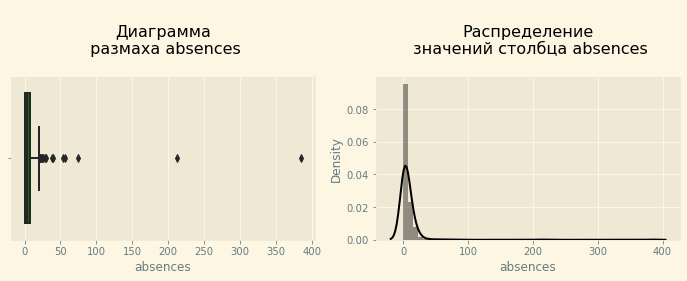

In [56]:
analysis_num_values(df, df.absences.name)

##### Анализируем столбец score
Используем аналитическую функцию analysis_num_values

Столбец -  score
Количество пустых значений = 6 из 395 (1.52%)
Количество уникальных значений =  18
Список значений =  [ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  nan  20.]
Границы выбросов: Нижняя - -5.0, Верхняя - 115.0
Найдено выбросов: 0 ≈ 0.00%


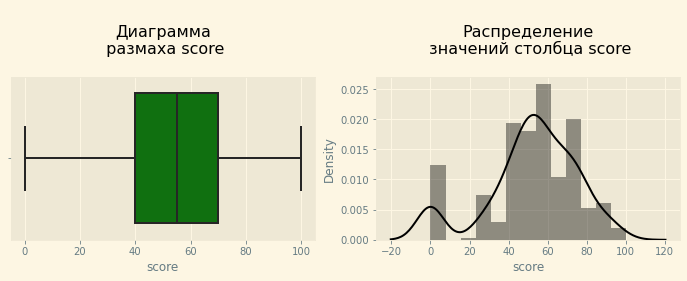

In [57]:
analysis_num_values(df, df.score.name)

### Выводы:
 * количество NaN значений: хорошее - 1%
 * уникальных значений: 18, удовлетворительное значение
 * выбросов нет.
 
 Будем использовать функцию replace_Nan_mode.

In [58]:
replace_Nan_mode(df, df.score.name)

Проверим что получилось еще раз запустив аналитическую функцию:

Столбец -  score
Количество пустых значений = 0 из 395 (0.00%)
Количество уникальных значений =  18
Список значений =  [ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  20.]
Границы выбросов: Нижняя - -5.0, Верхняя - 115.0
Найдено выбросов: 0 ≈ 0.00%


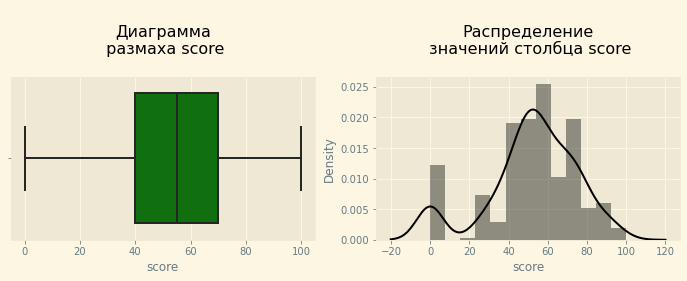

In [59]:
analysis_num_values(df, df.score.name)

## Общий вывод раздела аналитики столбцов
### 1. Анализ Номинативных значений датафрейма

Подавляющее большинство номинативных значений датафрейма удовлетворительные и подходят для анализа.
Хорошее количество уникальных значений и равномерное распредление данных.

Желательно исключить из последующего анализа столбцы Pstatus, Fjob и higher. Смещения по этим столбцам носит существенный характер и меньшие значение представлены мало, что исказит последующий анализ.

Столбец "school" желательно тоже исключить или рассматривать с большой осторожностью потому как также идет смещение в сторону одной из школ и значения по второй школе могут быть недостаточными для полноценного анализа. Тоже само касается и столбца "schoolsup".


### 2. Анализ Числовых значений датафрейма

Данные содержат два показательных столбца с хорошим распределением и наполненностью - absences, score. 
Остальные числовые столбцы скорее помогут разделить данные по категориям сортировками.

## Корреляционный анализ
Проведем проверку и проверим различаются ли распределения оценок в зависимости от значения категориальных переменных.
### 1. Анализ Номинативных значений датафрейма

In [60]:
## Определяем функцию построения Диаграмм размаха (Boxplot) для показателя Score.
def draw_boxplot_score(df, column_name):
    fig, ax = plt.subplots(figsize=(15, 3))
    sns.boxplot(x=column_name, y=df.score.name,
                data=df,
                ax=ax)
    plt.show()

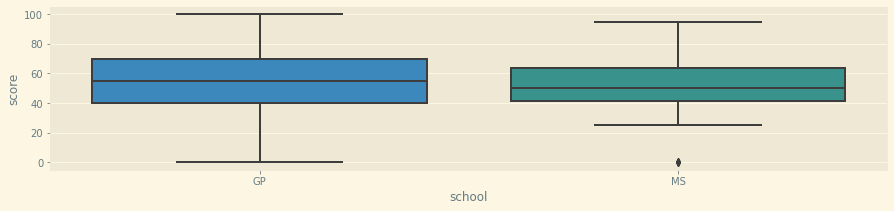

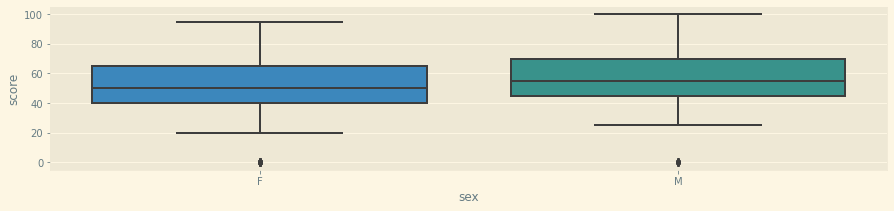

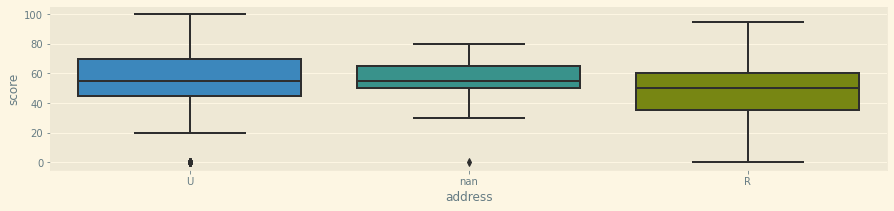

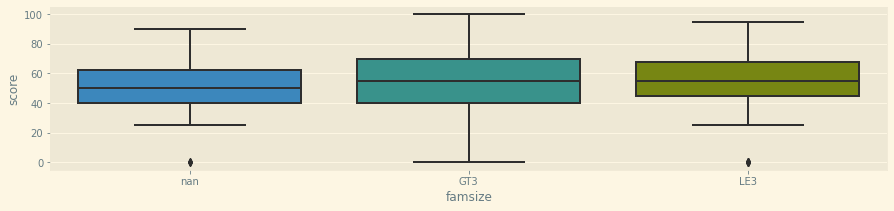

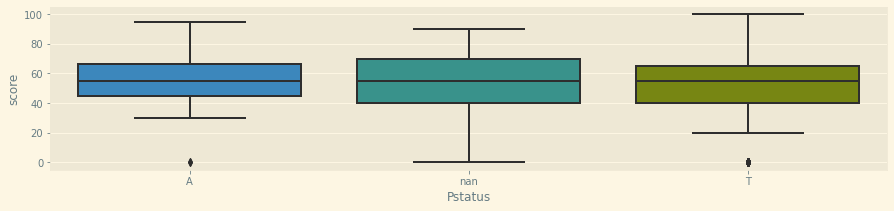

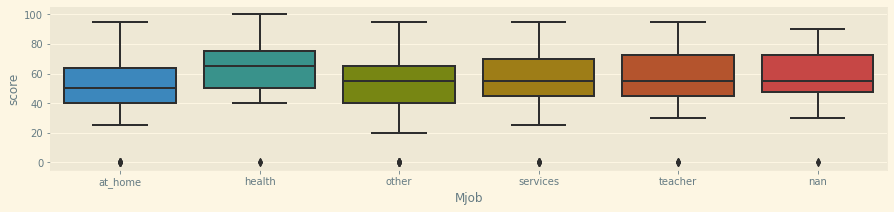

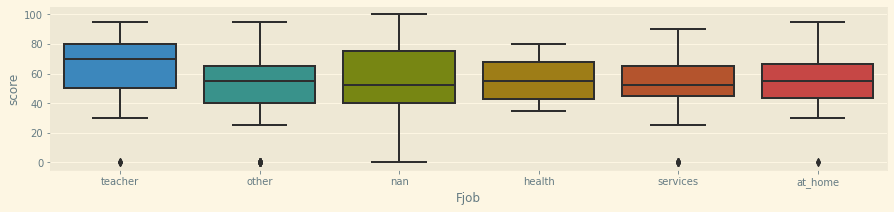

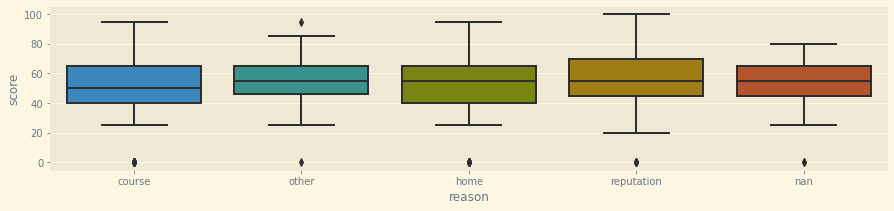

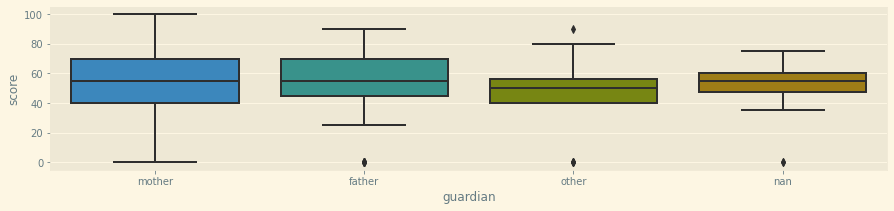

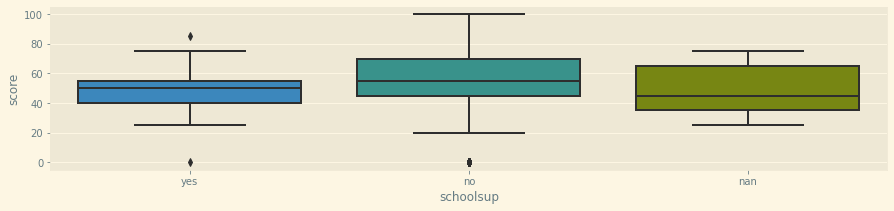

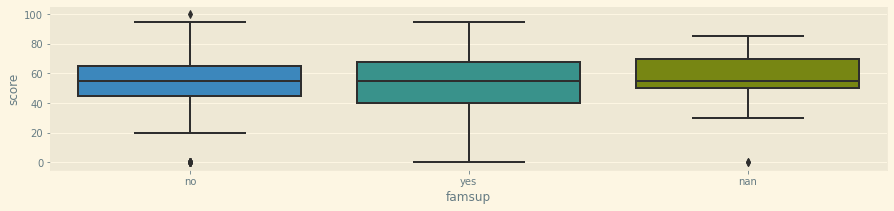

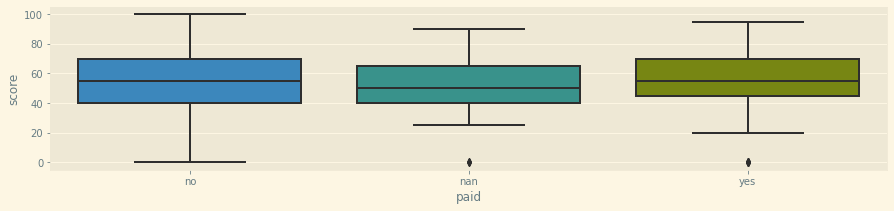

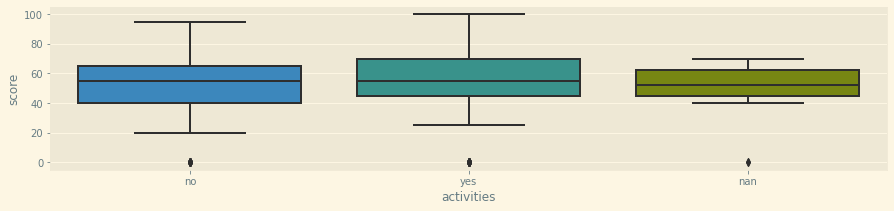

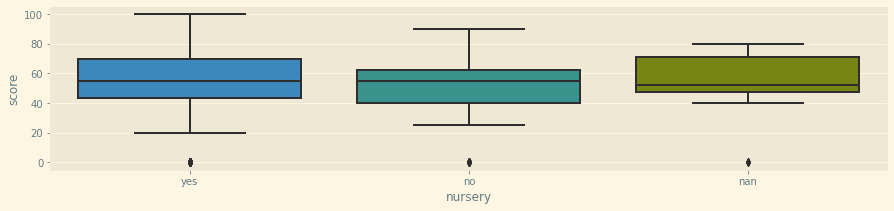

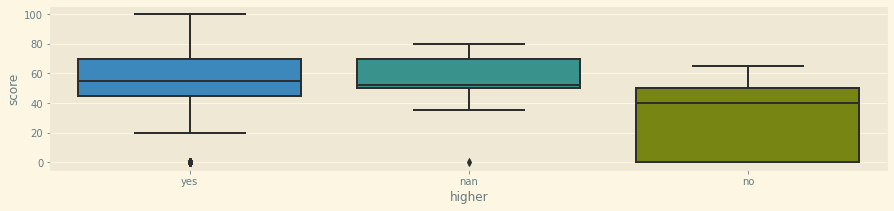

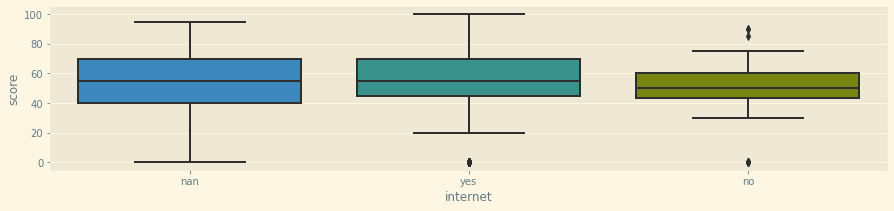

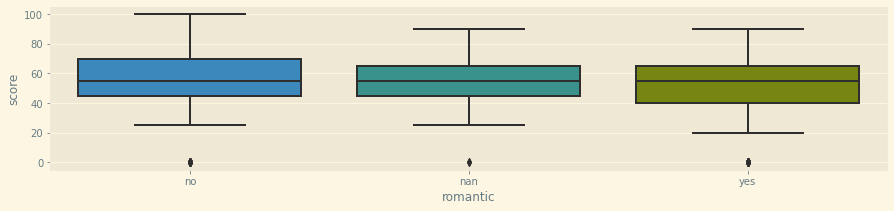

In [61]:
# Строим Диаграммы размаха (Boxplot)
for column_name in df.dtypes[df.dtypes == 'object'].index:
    draw_boxplot_score(df, column_name)

Вывод:
* Все столбцы так или иначе влияют на результат score. 
* Cлучаев, когда score распределено независимо от значения столбца нет.

Тем не менне видно, что оценки должны быть выше, поскольку лучшими значениями, при которых оценка максимальна, являются school, sex и SchooSup. Поэтому можно предположить, что это может повлиять на оценку.
Также стоит отметить, что Fjob имеет наибольшее разнообразие переменных, что потенциально может указывать на большую полезность этих переменных.

Проверим предположение:

In [62]:
#  Применим функция проверяющую методом Стьюдента
def find_stat_diff(column_name):
    cols = df.loc[:, column_name].value_counts().index[:18]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column_name] == comb[0], 'score'],
                     df.loc[df.loc[:, column_name] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Не забываем про поправку Бонферрони
            print('Обнаружены статистически значимые различия для столбца', column_name)
            break

In [63]:
for column_name in df.dtypes[df.dtypes == 'object'].index:
    find_stat_diff(column_name)

Обнаружены статистически значимые различия для столбца sex
Обнаружены статистически значимые различия для столбца higher
Обнаружены статистически значимые различия для столбца romantic


Чтобы провести корреляционный анализ для категориальных переменных нужно преобразовать эти переменные.

In [64]:
# Делаем дополнительный Датафрейм для Тепловой диаграммы
df_HeatMap = df.copy()

for x in df.dtypes[df.dtypes == 'object'].index:
    le = LabelEncoder() # Не забываем добавить библиотеку в import в начале
    le.fit(list(df[x].values) + list(df[x].values))
    df_HeatMap[x] = le.transform(list(df[x].values))

In [65]:
df_HeatMap = df_HeatMap[df.dtypes[df.dtypes == 'object'].index]
df_HeatMap['score'] = df['score']
df_HeatMap.head(3)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,score
0,0,0,1,2,0,0,5,0,1,2,1,1,1,2,2,0,1,30.0
1,0,0,1,0,2,0,3,0,0,1,2,1,1,1,2,2,1,30.0
2,0,0,1,1,1,0,3,3,1,2,1,0,1,2,2,2,0,50.0


<AxesSubplot:>

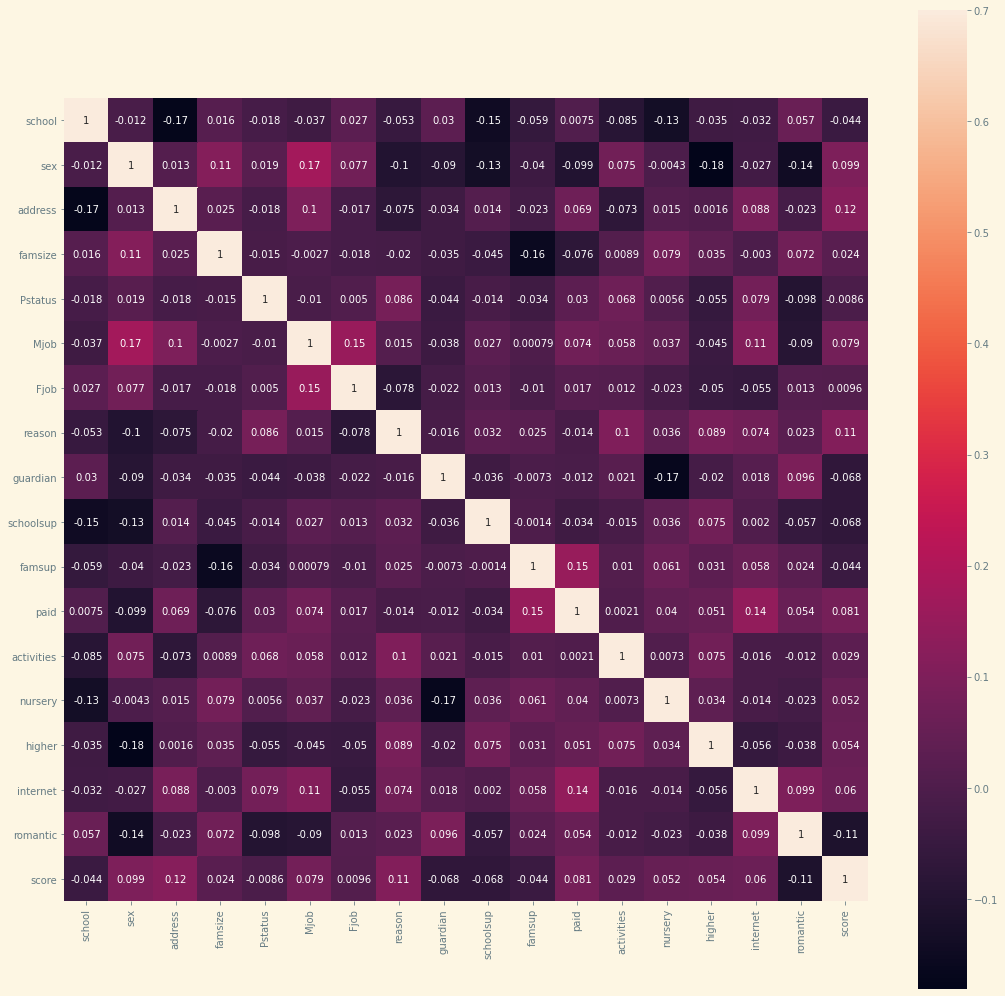

In [66]:
# Строим Тепловую диаграмму

corr = df_HeatMap[df_HeatMap.columns[0:18]].corr()

fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr, vmax=.7, square=True, annot=True)

Вывод:
    
* Удачные корреляции с нашей целью находятся в следующих столбцах: sex, address, Fjob, schoolsup

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              395 non-null    object 
 4   famsize              395 non-null    object 
 5   Pstatus              395 non-null    object 
 6   Medu                 395 non-null    float64
 7   Fedu                 395 non-null    float64
 8   Mjob                 395 non-null    object 
 9   Fjob                 395 non-null    object 
 10  reason               395 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           395 non-null    float64
 13  studytime            395 non-null    float64
 14  failures             395 non-null    float64
 15  schoolsup            395 non-null    obj

### 2. Анализ Числовых значений датафрейма

Начнем сразу с Тепловой карты и посмотрим корреляцию.

Ранг Матрицыx: 13
Определитель матрицы :-4.0494737542340354e-06
Форма матрицы:(13, 13)


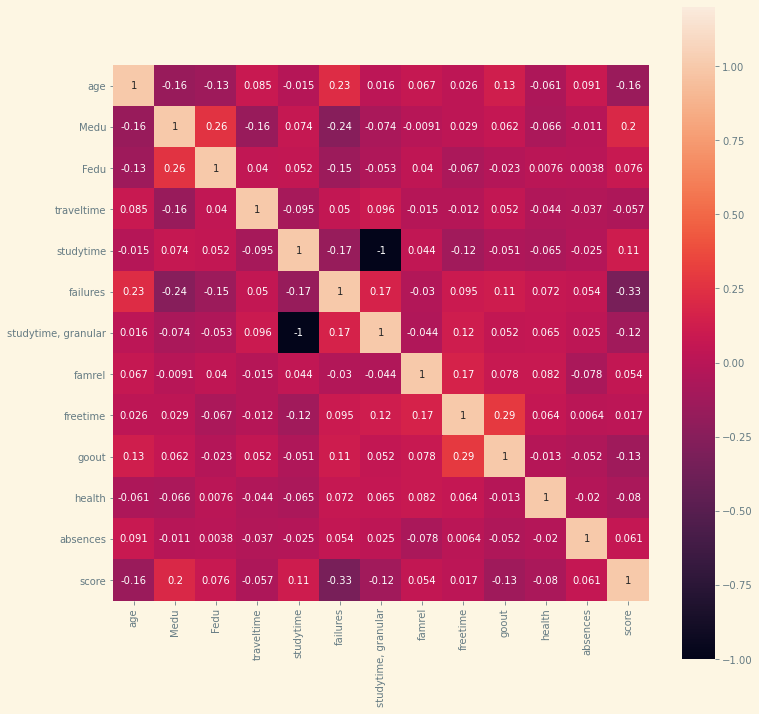

In [68]:
x = df.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(x, vmax=1.2, square=True, annot=True)

print(f'Ранг Матрицыx: {np.linalg.matrix_rank(x)}')
print(f'Определитель матрицы :{np.linalg.det(x)}')
print(f'Форма матрицы:{np.shape(x)}')

studytime и studytime, granular полностью взаимосвязаны.

Множественная линейная регрессия исследует влияние нескольких независимых переменных на одну целевую переменную.
Метод нашел в интернет, попробую применить корректно.

In [69]:
# Для метода добавляем в начало - import statsmodels.formula.api as smf
lm = smf.ols(formula='score ~ Medu + Fedu + traveltime + studytime'
             '+failures + famrel + freetime + goout + health + absences', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     6.995
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           4.20e-10
Time:                        18:15:02   Log-Likelihood:                -1761.1
No. Observations:                 395   AIC:                             3544.
Df Residuals:                     384   BIC:                             3588.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.8040      8.141      5.504      0.000      28.798      60.810
Medu           2.6850      1.056      2.543      0.011       0.609       4.761
Fedu          -0.0125      0.517     -0.024      0.981      -1.029       1.004
traveltime    -0.2556      1.616     -0.158      0.874      -3.432       2.921
studytime      1.5170      1.315      1.154      0.249      -1.069       4.103
failures      -8.7705      1.559     -5.625      0.000     -11.836      -5.705
famrel         1.3063      1.224      1.068      0.286      -1.100       3.712
freetime       1.7816      1.168      1.526      0.128      -0.514       4.077
goout         -2.5597      1.024     -2.500      0.013      -4.572      -0.547
health        -0.9353      0.774     -1.209      0.228      -2.457       0.586
absences       0.0733      0.046      1.577      0.116      -0.018       0.165
==============================================================================
Omnibus:                       40.432   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.133
Skew:                          -0.813   Prob(JB):                     1.30e-11
Kurtosis:                       3.635   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Выводы: 
* Поскольку мы получили P>|t| значение <0,05 для трех факторов: Medu, failures  и goout, мы можем видеть, что только эти факторы имеют значительную связь с исследуемой целевой переменной - оценкой. Однако нам нужно выяснить, влияют ли на цель другие переменные.
* 13,2% (Adj. R-squared) изменчивости нашей целевой переменной объясняется этой моделью.
* Число Cond. No. = 187. Это может указывать на отсутствие сильной мультиколлинеарности или других числовых проблем.

In [70]:
lm = smf.ols(
    formula='score ~ freetime + goout + famrel + traveltime + failures + Medu', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     10.70
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           5.09e-11
Time:                        18:15:02   Log-Likelihood:                -1763.9
No. Observations:                 395   AIC:                             3542.
Df Residuals:                     388   BIC:                             3570.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.4520      7.000      6.636      0.000      32.690      60.214
freetime       1.6106      1.158      1.391      0.165      -0.666       3.887
goout         -2.6114      1.023     -2.552      0.011      -4.623      -0.600
famrel         1.1288      1.215      0.929      0.353      -1.260       3.518
traveltime    -0.4046      1.602     -0.253      0.801      -3.555       2.745
failures      -8.9934      1.538     -5.846      0.000     -12.018      -5.969
Medu           2.7813      1.022      2.721      0.007       0.772       4.791
==============================================================================
Omnibus:                       40.233   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.905
Skew:                          -0.807   Prob(JB):                     1.46e-11
Kurtosis:                       3.653   Cond. No.                         45.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Вывод:
* Параметр R-squared увеличился до 14,2%, что говорит о взаимосвязи столбцов с целью

### В финале можно удалить из Датафрейма ненужные столбцы для продолжения анализа

In [72]:
df = df.drop(['famsize', 'Pstatus', 'Fedu','Mjob', 'reason',
              'guardian', 'studytime','famsup','paid','activities',
              'nursery','studytime, granular','higher','internet',
              'romantic','freetime', 'health','absences'], axis=1)

In [73]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   Medu        395 non-null    float64
 5   Fjob        395 non-null    object 
 6   traveltime  395 non-null    float64
 7   failures    395 non-null    float64
 8   schoolsup   395 non-null    object 
 9   famrel      395 non-null    float64
 10  goout       395 non-null    float64
 11  score       395 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 37.2+ KB


,age,Medu,traveltime,failures,famrel,goout,score
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.759494,1.407595,0.318987,3.941772,3.103797,52.227848
std,1.276043,1.099321,0.678490,0.726244,0.895081,1.104610,22.745530
min,15.000000,0.000000,1.000000,0.000000,-1.000000,1.000000,0.000000
25%,16.000000,2.000000,1.000000,0.000000,4.000000,2.000000,40.000000
50%,17.000000,3.000000,1.000000,0.000000,4.000000,3.000000,55.000000
75%,18.000000,4.000000,2.000000,0.000000,4.500000,4.000000,70.000000
max,22.000000,4.000000,4.000000,3.000000,5.000000,5.000000,100.000000


In [74]:
df.head(5)

,school,sex,age,address,Medu,Fjob,traveltime,failures,schoolsup,famrel,goout,score
0,GP,F,18,U,4.0,teacher,2.0,0.0,yes,4.0,4.0,30.0
1,GP,F,17,U,1.0,other,1.0,0.0,no,5.0,3.0,30.0
2,GP,F,15,U,1.0,other,1.0,3.0,yes,4.0,2.0,50.0
3,GP,F,15,U,4.0,nan,1.0,0.0,no,3.0,2.0,75.0
4,GP,F,16,U,3.0,other,1.0,0.0,no,4.0,2.0,50.0


##### Заключительные Выводы:

* В Датафрейме было относительно много пропущенных данных и присутствуют выбросы, причем некоторые по смыслу столбцов реальными выбросами не являются.
* В числовых столбцах (пропуски, баллы) были выбросы. Это также было очищено.
* Статистически значимые изменения были обнаружены для столбцов sex, address, Fjob и schoolsup.